In [1]:
### 週販レポート2025年版
#
### Switch2の動向を見るもの
# Switch2と過去の初動が高い機種との、ロンチ直後の推移グラフ（参考値としてPS5を添える)
# PS5/Switch2累積台数差グラフ

# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi

hard_sales_df = hs.load_hard_sales()

def show_title(df: pd.DataFrame) -> None:
    last_updated = df.iloc[-1]["report_date"]
    last_updated_str = last_updated.strftime("%Y-%m-%d")
    title = Markdown(f"# ハード週販状況 ({last_updated_str})")
    display(title)

show_title(hard_sales_df)

# ハード週販状況 (2025-08-17)

In [2]:

# 現役機種の絶対タイムライン累積グラフ
# 現役機種の相対タイムライン累積グラフ
# 過去2年と今年の機種ごと販売数シェア(円グラフを3つ)


## 直近4週間のハード売り上げ／累計推移


In [3]:
def last4weeks_report(df: pd.DataFrame) -> pd.DataFrame:
    last_updated = df.iloc[-1]["report_date"]
    start_date = last_updated - Timedelta(weeks=3)  # 4週間前の日付を計算

    last4weeks_df = df.loc[(df['report_date'] >= start_date)][['report_date', 'full_name', 'units', 'sum_units']]
    last4weeks_df.set_index(['report_date', 'full_name'], inplace=True)
    last4weeks_df.sort_values(by=['report_date', 'units', 'full_name'], ascending=[True, False, True], inplace=True)

    # カラム名を日本語にする
    last4weeks_df.columns = ['販売数', '累計']
    # indexを日本語にする
    last4weeks_df.index.names = ['報告日', 'ハード']
    last4weeks_df.index = last4weeks_df.index.set_levels(
        last4weeks_df.index.levels[0].strftime('%Y-%m-%d'), level=0
    )
    # スタイルを適用して表示
    last4weeks_df.style.format({'販売数': '{:,}', '累計': '{:,}'})
    return last4weeks_df

last4weeks_report(hard_sales_df)

販売数        累計
報告日        ハード                              
2025-07-27 Nintendo Switch2  92013   1614390
           Nintendo Switch   14643  35850981
           PlayStation5       6920   6939238
           Xbox Series X|S     271    681795
           PlayStation4         18   9490688
2025-08-03 Nintendo Switch2  62733   1677123
           Nintendo Switch   18637  35869618
           PlayStation5       7141   6946379
           Xbox Series X|S     271    682066
           PlayStation4         19   9490707
2025-08-10 Nintendo Switch2  89820   1766943
           Nintendo Switch   18673  35888291
           PlayStation5       8565   6954944
           Xbox Series X|S     326    682392
           PlayStation4         16   9490723
2025-08-17 Nintendo Switch2  89821   1856764
           Nintendo Switch   18673  35906964
           PlayStation5       8566   6963510
           Xbox Series X|S     326    682718
           PlayStation4         16   9490739

## 直近6ヶ月の販売推移

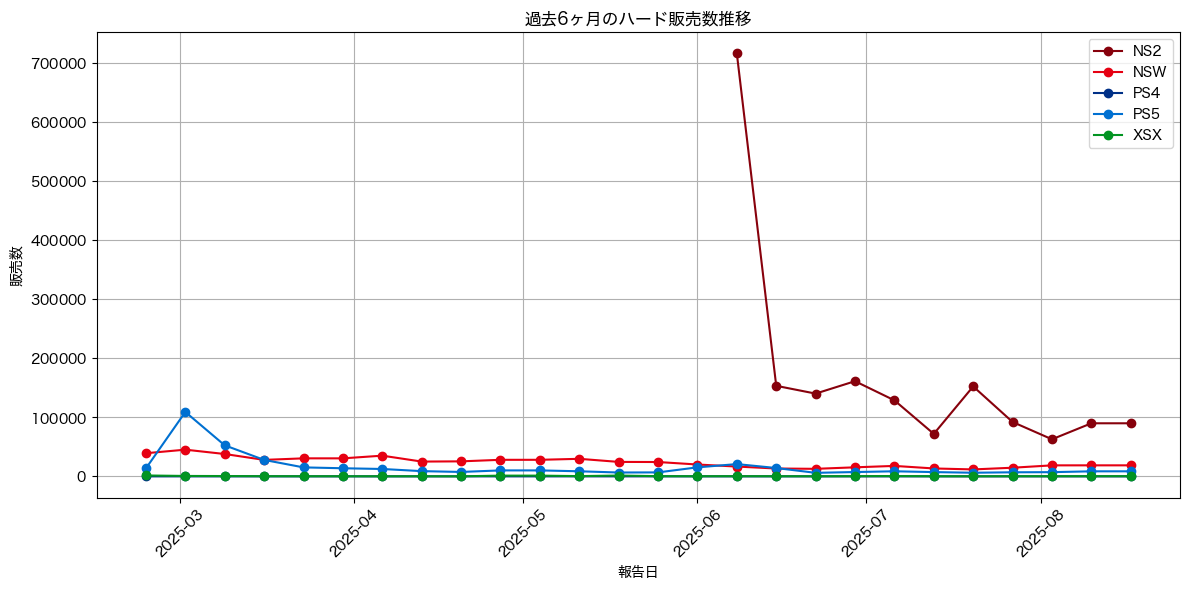

In [ ]:
# 半年間の販売数折れ線グラフ
def pivot_recent_sales(df:pd.DataFrame, months:int = 6) -> pd.DataFrame:
    
    last_updated = df.iloc[-1]["report_date"]
    start_date = last_updated - pd.DateOffset(months=months)  # 半年前の日付を計算
    recent_df = df.loc[(df['report_date'] >= start_date)]
    
    pivot_df = recent_df.pivot(index='report_date', columns='hw', values='units')
    # pivot_df = pivot_df[["NS2", "PS5", "NSW"]]
    
    return pivot_df

def plot_recent_sales(df:pd.DataFrame, months:int = 6, exclude:list[str] = []) -> None:
    pivot_df = pivot_recent_sales(df, months)
    
    # 日本語ラベルのためのフォント設定
    plt.rcParams['font.family'] = 'Hiragino Sans'
    plt.rcParams['axes.unicode_minus'] = False
    fig, ax = plt.subplots(figsize=(12, 6))
    for column in pivot_df.columns:
        col = hi.get_hard_colors([column])[0]
        if column in exclude:
            continue
        ax.plot(pivot_df.index, pivot_df[column], marker='o', label=str(column), color=col)

    ax.set_title(f'過去{months}ヶ月のハード販売数推移')
    ax.set_xlabel('報告日')
    ax.set_ylabel('販売数')
    ax.legend()
    ax.grid(True)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.tick_params(axis='x', rotation=45)
    fig.tight_layout()
    plt.show()
    

plot_recent_sales(hard_sales_df, months=6)




Switch2のロンチ週が突出しているため他機種の状況がわかりません。Switch2を除いた販売推移はこちら。

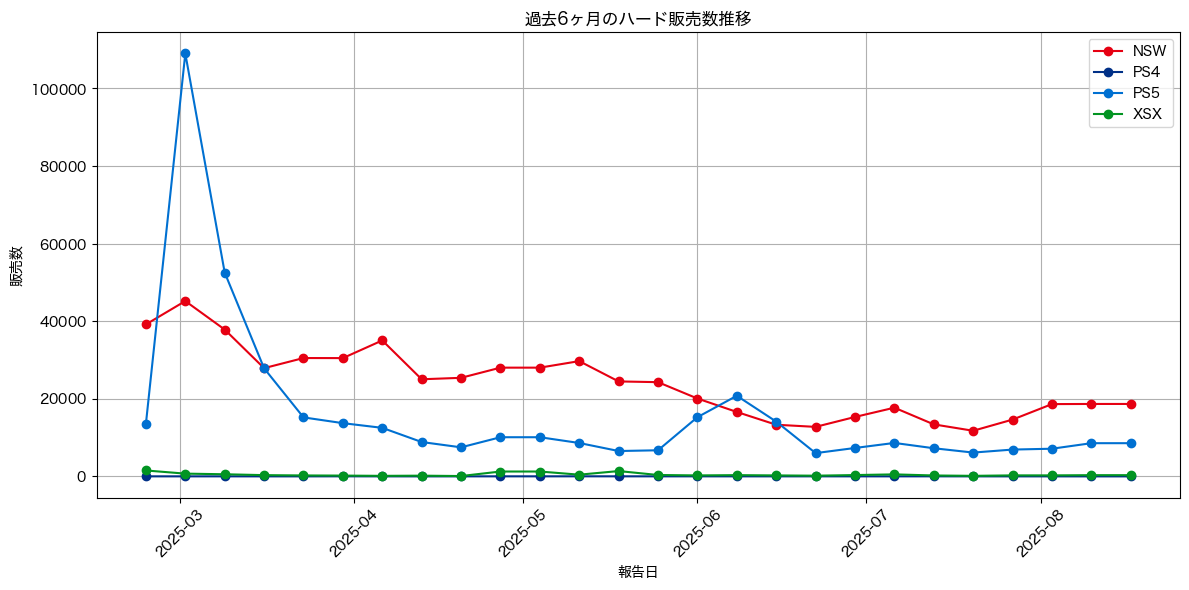

In [33]:
plot_recent_sales(hard_sales_df, months=6, exclude=['NS2'])

## 累計状況

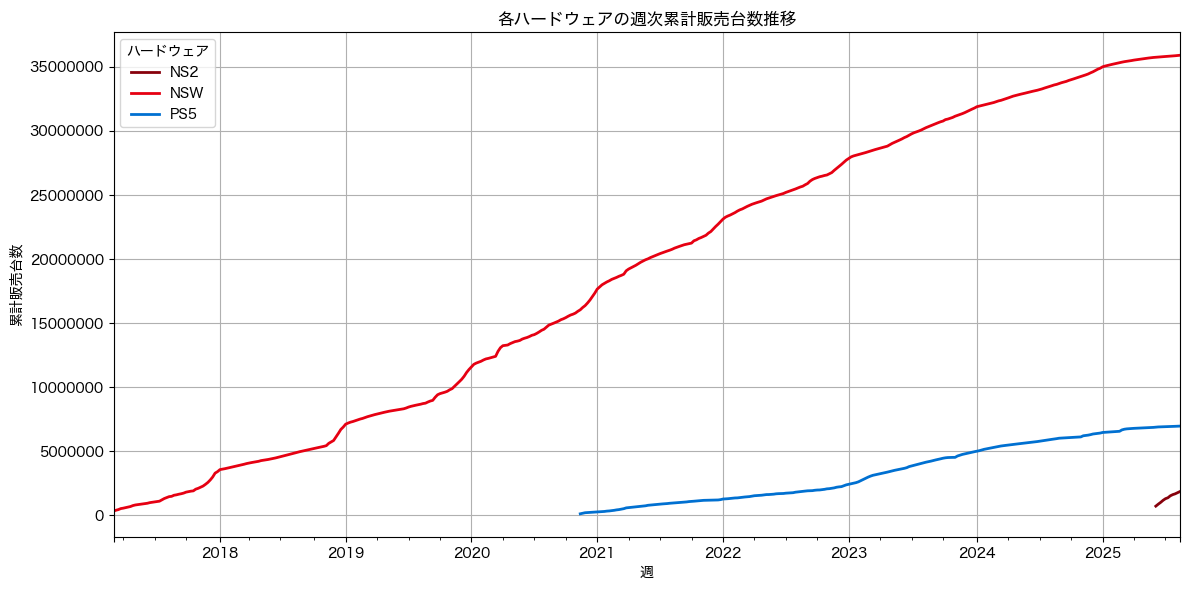

In [5]:
fig = ph.plot_cumulative_sales(hard_sales_df, hw=['NS2', 'PS5', 'NSW'])

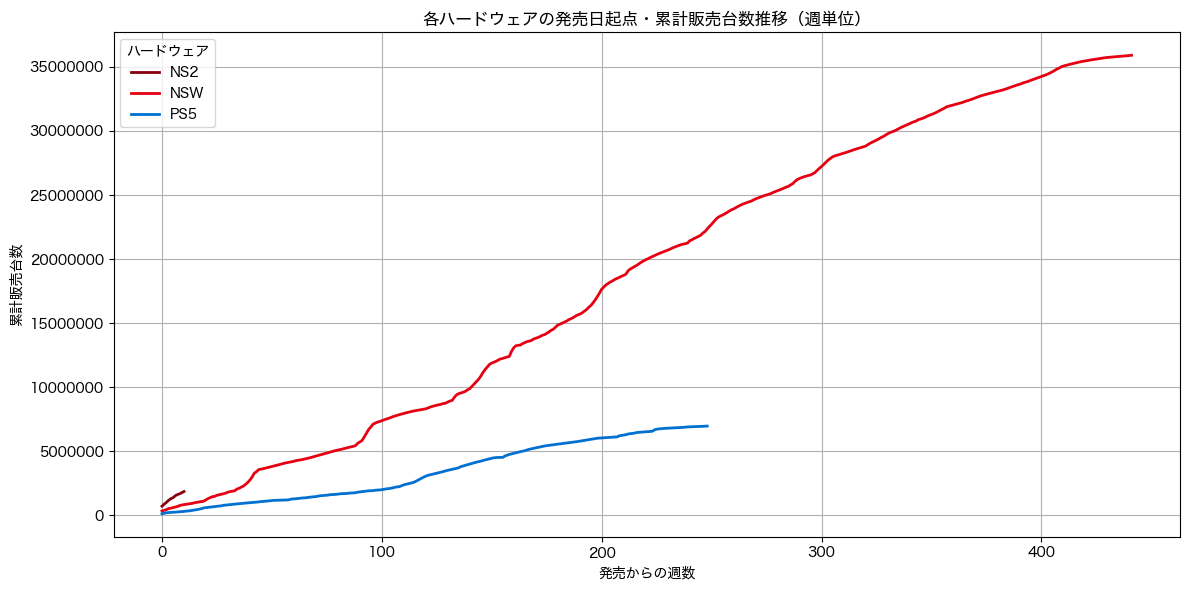

In [6]:
fig2 = ph.plot_cumulative_sales_by_delta(hard_sales_df, hw=['NS2', 'PS5', 'NSW'])

## ハード販売シェア

2025年のシェアは1月から現時点までの状況です。

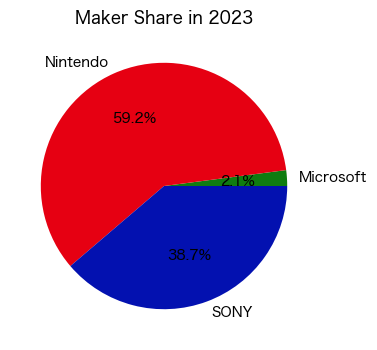

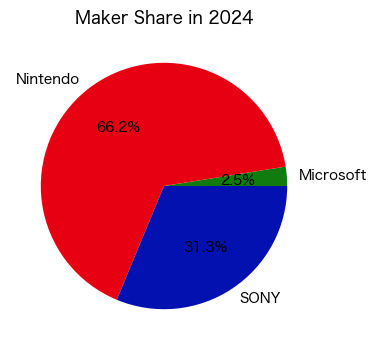

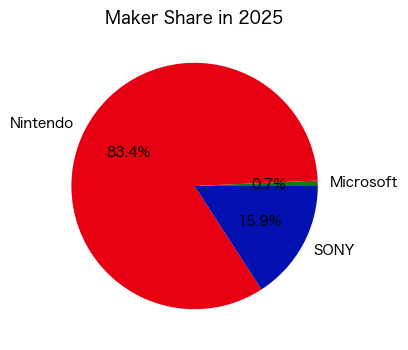

In [19]:
maker_sales = hs.pivot_maker(hard_sales_df).resample('Y').sum().loc['2023':]
# 全ての行の値が0の列を削除
maker_sales = maker_sales.loc[:, (maker_sales != 0).any(axis=0)]

def plot_pie_chart_by_maker_year(s:pd.Series) -> None:
    s_data = s[s > 0]
    colors = hi.get_maker_colors(s_data.index.to_list())
    plt.figure(figsize=(4, 4))
    plt.pie(s_data, labels=s_data.index, autopct='%1.1f%%', 
            colors=colors)
    plt.title(f'Maker Share in {s_data.name.year}')
    plt.show()

for idx, s in maker_sales.iterrows():
    plot_pie_chart_by_maker_year(s)

## Switch2販売状況

### 歴代初動が高い機種との比較

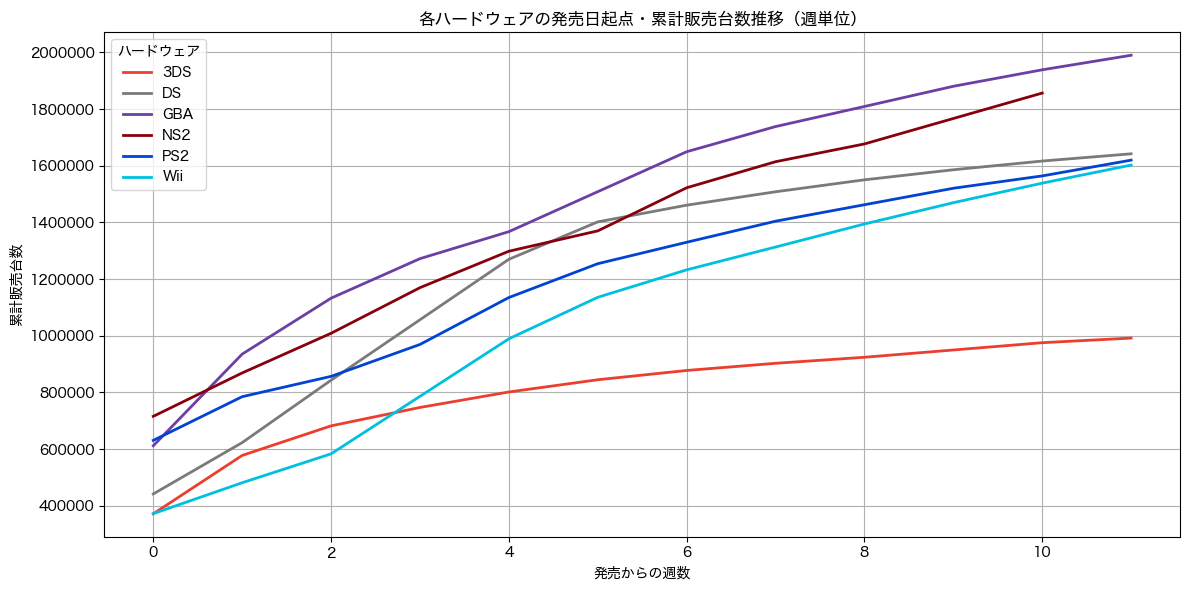

In [22]:
fig3 = ph.plot_cumulative_sales_by_delta(hard_sales_df, 
                                         hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS"], 
                                         limit=12, mode="week")

### PS5/Switch2累積台数差

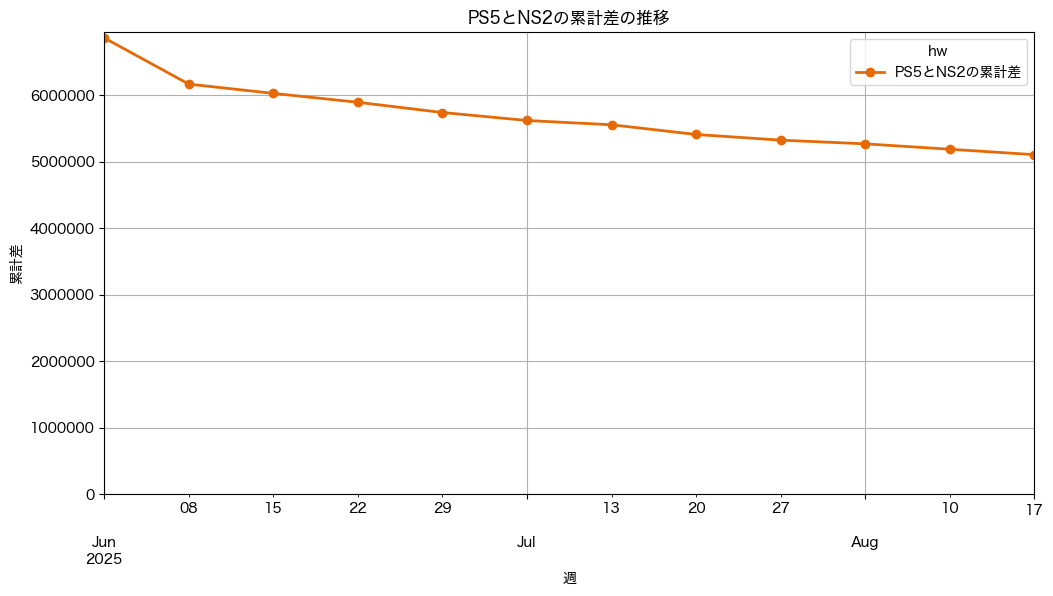

In [60]:
def cumsum_diff(df:pd.DataFrame, base_hw:str, cmp_hw:str) -> pd.DataFrame:
    cumsum_df = hs.pivot_cumulative_sales(df, hw=[base_hw, cmp_hw])
    # column:cmp_hwの値がNA以外になった最初の行の直前のindexを得る
    first_valid_index = cumsum_df[cmp_hw].first_valid_index()
    if first_valid_index is not None:
        idx_list = list(cumsum_df.index)
        pos = idx_list.index(first_valid_index)
        # 直前の行が存在する場合はそのindexから
        start_pos = max(pos - 1, 0)
        start_index = idx_list[start_pos]
        cumsum_df = cumsum_df[cumsum_df.index >= start_index]

    cumsum_df = cumsum_df.fillna(0)
    cumsum_df["diff"] = cumsum_df[base_hw] - cumsum_df[cmp_hw]
    cumsum_df = cumsum_df[cumsum_df["diff"] >= -20000]
    return cumsum_df[["diff"]].rename(columns={"diff": f"{base_hw}と{cmp_hw}の累計差"})

def plot_cumsum_diff(df:pd.DataFrame, base_hw:str, cmp_hw:str, marker:bool=True) -> None:
    cumsum_diff_df = cumsum_diff(df, base_hw, cmp_hw)

    fig, ax = plt.subplots(figsize=(12, 6))
    plt.rcParams['font.family'] = 'Hiragino Sans'
    plt.rcParams['axes.unicode_minus'] = False
    if marker:
        marker_str = 'o'
    else:
        marker_str = ''
    cumsum_diff_df.plot(ax=ax, kind='line', marker=marker_str, 
                        linewidth=2, color="#E56A06")
    ax.set_title(f"{base_hw}と{cmp_hw}の累計差の推移")
    ax.set_xlabel("週")
    ax.set_ylabel("累計差")
    # 縦軸の表示を指数表示から整数表示に変更
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_ylim(bottom=0)
    ax.grid(True)

plot_cumsum_diff(hard_sales_df, "PS5", "NS2")


#### 参考:PS4とSwitchとの累計差の推移

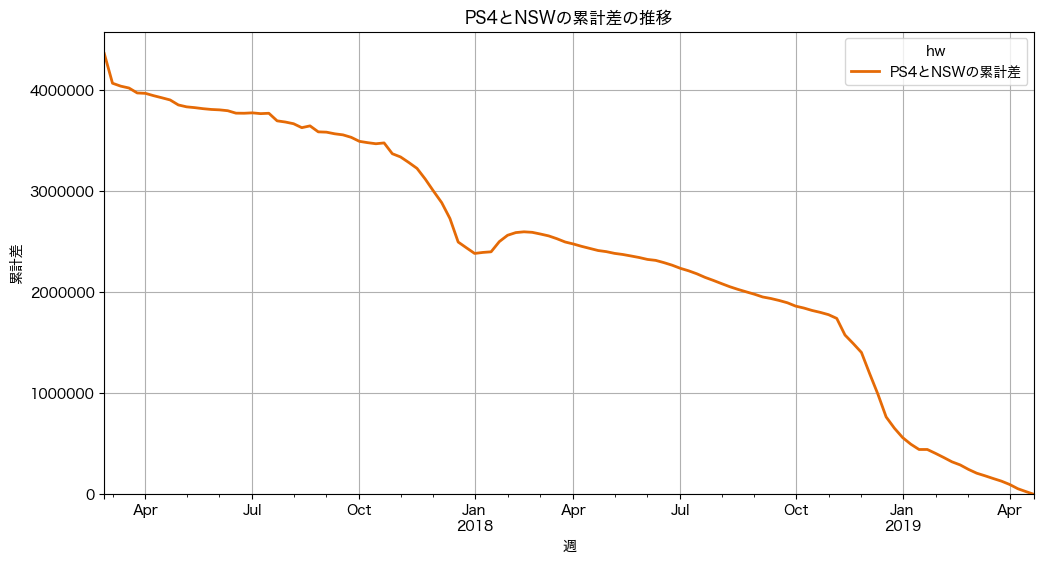

In [63]:

ps4_nsw = plot_cumsum_diff(hard_sales_df, "PS4", "NSW", marker=False)


* ハードウェアの販売データはファミ通の調査結果を元にしています。
* 一部のデータについては処理の都合上、1週間毎の値にアレンジしています。